In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.optimize as spy
%matplotlib inline

## Part a

In [9]:
num_agents = 500; # number of members partaking in transactions
m0 = 1000; # average money per agent, will also be the starting money
beta = 1/m0 # equation variable
money_tot = m0 * num_agents # total money, will be conserved

In [10]:
# transaction quantification value epsilon
def epsilon():
    return np.round(np.random.uniform(0,1),2)

# used to asign transactions between two random agents
def rand_agent():
    return np.int(np.round(np.random.uniform(0,num_agents - 1),0))

In [11]:
# vector container for all agents with starting money, m0
def agent():
    agents = np.zeros(num_agents);
    agents += m0;
    return agents

In [12]:
def transactions(agents,num):
    i = 0
    while i < num:
        #exchange quantifier and agent identification
        ep = epsilon()
        one = rand_agent()
        two = rand_agent()
        if one == two:
            two = rand_agent()
        
        #perform transaction
        Mone = agents[one]
        Mtwo = agents[two]
        Msum = Mone + Mtwo
        Moneprime = np.round(ep * Msum, 2)
        #Mtwoprime = (1 - ep) * Msum 
        Mtwoprime = Msum - Moneprime
        
        #update agent wealth
        agents[one] = Moneprime
        agents[two] = Mtwoprime
        
        i += 1

In [21]:
def history(vector, num):
    wealth = vector
    plt.figure('histogram')
    n, bins, patches = plt.hist(vector, 100, alpha=0.5)
    n = np.append(n,0)
    plt.title('Wealth Distribution after: ' + str(num) + ' transactions')
    plt.xlabel('Wealth [Dollars]')
    plt.ylabel('Occurance')
    hold = True
    y = np.exp(-beta*bins) * np.max(n)
    plt.plot(bins,y, 'r')
    plt.show()
    return n, bins

In [22]:
def repitition(num):
    rep = 0
    loss = 0
    check = 0
    vector = agent()
    # to check for equilibrium we calculate the new mean after successive simulations and wait for delW_avg = 0.05 %
    while check < 1:
        # to ensure the conservation of wealth we introduce an if statement for money loss
        if np.abs(loss) < 1:
            std_old = np.std(vector)
            transactions(vector,num)
            money_after = sum(vector)
            loss = money_tot - money_after
            rep += 1
            agents = vector
            std_new = np.std(vector)
            if np.abs((std_new - std_old)/std_old) < 0.005:
                check = 1
                print('Equilibrium: established')
                print('std of wealth: ', std_new)
                print('rep count: ', rep)
            else:
                pass
        else:
            check = 1
            print('money is not being conserved')
            print('net difference: ', loss)
            print('failed with rep count: ', rep)

    return agents

Num represents the number of transactions that will occur in each simulation

the repitition function performs a num of transactions between the same num_agents until a change in the systems net money occurs. 

A histogram of the last stable system is plotted with an overlay of the gibs distribution in red

C:\Users\samme\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in double_scalars


money is not being conserved
net difference:  12.3199999999
failed with rep count:  4


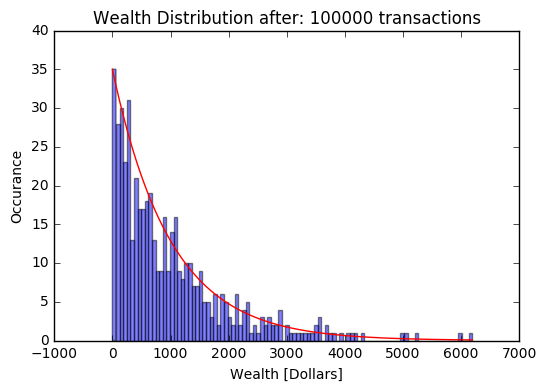

In [23]:
num = 10**5
agents = repitition(num)
n, bins = history(agents,num)

## Part b

n = A * exp(-beta * bins)

ln n = ln A - beta * bins

A = 10 * beta * |bins - max(bins)|

ln n/A = -beta * bins = ln n/max(n)

In [29]:
n_temp = []
bins_temp = []
for i in np.arange(len(n)):
    if n[i] > 0:
        n_temp.append(n[i])
        bins_temp.append(bins[i])
    else:
        pass
# makes bins_t back into a np array
bins_t = np.zeros(len(n_temp))
for i in np.arange(len(n_temp)):
    bins_t[i] = bins_temp[i]


In [30]:
[[a,b],c] = spy.curve_fit(lambda m,a,b: -b*m, bins_temp, n_temp)

C:\Users\samme\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


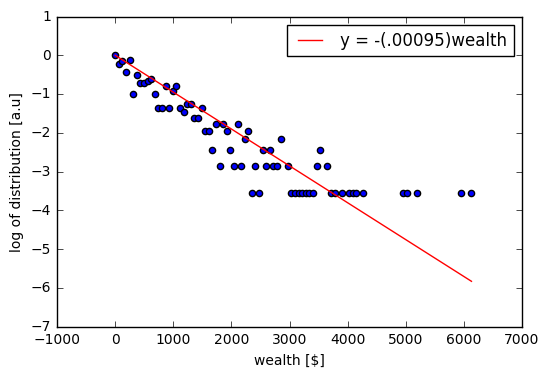

In [44]:
plt.figure('log')
plt.scatter(bins_t,np.log(n_temp/np.max(n_temp)))
hold = True
plt.plot(bins_t, b* bins_t,color='r',label = 'y = -(.00095)wealth')
plt.ylabel('log of distribution [a.u]')
plt.legend()
plt.xlabel('wealth [$]')

In [38]:
a,b,c

(1.0, -0.00095159167598273485, array([[ inf,  inf],
        [ inf,  inf]]))

In [39]:
1/b

-1050.8708989780439